In [2]:
from ultralytics import YOLO
from pathlib import Path

BEST_PT   = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\runs\exercise_v3best\weights\best.pt"   # <- change
INPUT_DIR = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\test_images"                          # folder with images (recursively OK)
PROJECT   = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\output"                              # output root
NAME      = "pred_simple"

IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",
            ".JPG",".JPEG",".PNG",".BMP",".TIF",".TIFF",".WEBP"}

# Build a recursive file list
files = [str(p) for p in Path(INPUT_DIR).rglob("*") if p.suffix in IMG_EXTS]
print(f"{len(files)} images to predict")

model = YOLO(BEST_PT)
results = model.predict(
    source=files,
    imgsz=896, conf=0.25, iou=0.5, 
    agnostic_nms=False, max_det=6,
    save=True, save_txt=True, save_conf=True,
    project=PROJECT, name=NAME, exist_ok=True,
    workers=0                            
)
print("Saved to:", results[0].save_dir)


105 images to predict

0: 896x896 (no detections), 304.4ms
1: 896x896 2 shoulder_presss, 304.4ms
2: 896x896 (no detections), 304.4ms
3: 896x896 (no detections), 304.4ms
4: 896x896 1 benchpress, 304.4ms
5: 896x896 1 deadlift, 3 squats, 304.4ms
6: 896x896 2 benchpresss, 1 squat, 304.4ms
7: 896x896 1 pushup, 1 squat, 304.4ms
8: 896x896 (no detections), 304.4ms
9: 896x896 (no detections), 304.4ms
10: 896x896 1 squat, 304.4ms
11: 896x896 1 deadlift, 304.4ms
12: 896x896 1 squat, 304.4ms
13: 896x896 2 squats, 304.4ms
14: 896x896 1 deadlift, 304.4ms
15: 896x896 1 deadlift, 1 shoulder_press, 304.4ms
16: 896x896 1 shoulder_press, 304.4ms
17: 896x896 (no detections), 304.4ms
18: 896x896 1 deadlift, 1 squat, 304.4ms
19: 896x896 (no detections), 304.4ms
20: 896x896 (no detections), 304.4ms
21: 896x896 2 squats, 304.4ms
22: 896x896 1 shoulder_press, 304.4ms
23: 896x896 1 leg_ext, 1 shoulder_press, 1 squat, 304.4ms
24: 896x896 1 leg_ext, 304.4ms
25: 896x896 1 leg_ext, 1 squat, 304.4ms
26: 896x896 1 p


image 1/1 C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\test_images\test_dl_6c.jpg: 544x896 1 deadlift, 79.8ms
Speed: 2.1ms preprocess, 79.8ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 896)
Results saved to C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\output\pred_one
1 label saved to C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\output\pred_one\labels
Saved to: C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\output\pred_one


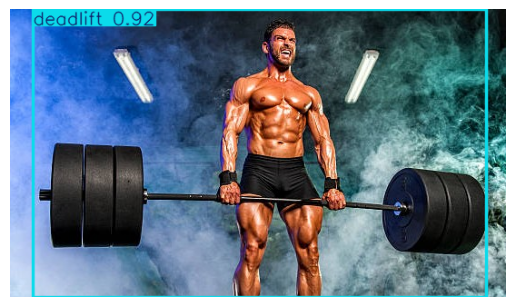

deadlift        conf=0.92 xyxy=[25.465618133544922, 0.0, 524.0902099609375, 317.0]


In [1]:
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt

BEST_PT   = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\runs\exercise_v3best\weights\best.pt"
PROJECT   = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\output"

# 1) point to ONE image (change this path)
IMG_PATH  = r"C:\Users\zihin\OneDrive\Desktop\Year 2\Tri 1\AA1 3001 Computer Vision and Deep Learn\AAI3001ComputerVision\test_images\test_dl_6c.jpg"
assert Path(IMG_PATH).is_file(), "IMG_PATH not found"

model = YOLO(BEST_PT)

# 2) predict that single image
results = model.predict(
    source=IMG_PATH,
    imgsz=896, conf=0.25, iou=0.5,
    agnostic_nms=False, max_det=6,
    save=True, save_txt=True, save_conf=True,
    project=PROJECT, name="pred_one", exist_ok=True,
    workers=0
)

print("Saved to:", results[0].save_dir)

# 3) (optional) show in notebook
plt.imshow(results[0].plot()[:, :, ::-1]); plt.axis("off"); plt.show()

# 4) (optional) print detections
names = results[0].names
for b in results[0].boxes:
    cls = int(b.cls)
    print(f"{names[cls]:<15} conf={float(b.conf):.2f} xyxy={b.xyxy[0].tolist()}")
